<a href="https://colab.research.google.com/github/bhj8286/dinsosaur_machine_learning_study/blob/main/%EC%88%98%EC%97%85%20%EC%8B%A4%EC%8A%B5/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 경로 변경
%cd /content/drive/MyDrive/my/pydata2025-3-20/pydata2025-3-20

!pwd # 변경 확인
import pandas as pd
# reading the data
import numpy as np
import chardet
with open('vote.csv', 'rb') as f:
  print(chardet.detect(f.read() ))

Mounted at /content/drive
/content/drive/MyDrive/my/pydata2025-3-20/pydata2025-3-20
/content/drive/MyDrive/my/pydata2025-3-20/pydata2025-3-20
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [2]:
with open('2012년_1당사자_법규위반별_주야별_교통사고.csv', 'rb') as f:
  print(chardet.detect(f.read()))

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [3]:
df = pd.read_csv('vote.csv')
df.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [4]:
df.shape

(211, 10)

In [5]:
df = pd.read_csv('2012년_1당사자_법규위반별_주야별_교통사고.csv', encoding='EUC-KR')
df.head()

,법규위반,주야,발생건수,사망자수,부상자수,중상,경상,부상신고
0,과속,주,159,34,334,140,178,16
1,과속,야,218,73,348,200,139,9
2,교차로 통행방법 위반,주,8817,82,14031,3915,9530,586
3,교차로 통행방법 위반,야,5904,29,9728,2401,6884,443
4,기타,주,9388,141,14070,4271,9217,582


In [6]:
df = pd.read_csv('vote.csv')

In [7]:
X=df[['gender', 'region', 'edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']]

In [8]:
X.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention
0,1,4,3,3,3,2,2,4.0
1,1,5,2,3,3,2,4,3.0
2,1,3,1,2,4,1,3,2.8
3,2,1,2,1,3,5,4,2.6
4,1,1,1,2,4,4,3,2.4


In [9]:
# 방법2: 특성위치값불러오기, 첫번째열부터8번째열까지의모든데이터를Y에리턴
X2= df[df.columns[0:8]]

In [10]:
X2.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention
0,1,4,3,3,3,2,2,4.0
1,1,5,2,3,3,2,4,3.0
2,1,3,1,2,4,1,3,2.8
3,2,1,2,1,3,5,4,2.6
4,1,1,1,2,4,4,3,2.4


In [11]:
X3=df.loc[:, 'gender':'score_intention']

In [12]:
X3.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention
0,1,4,3,3,3,2,2,4.0
1,1,5,2,3,3,2,4,3.0
2,1,3,1,2,4,1,3,2.8
3,2,1,2,1,3,5,4,2.6
4,1,1,1,2,4,4,3,2.4


In [13]:
Y1=df[[ 'vote' ]] # Targetattribute

In [14]:
# 'Car-selling price.csv 데이터이용
df= pd.read_csv('Car-selling price.csv', encoding = 'EUC-KR')

In [15]:
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

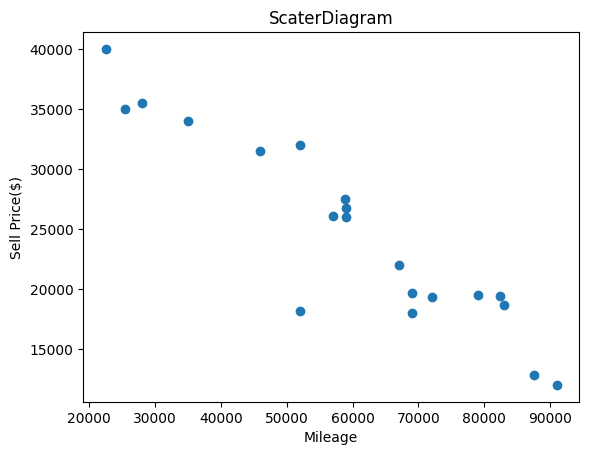

In [17]:
plt.title("ScaterDiagram")
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'], df['Sell Price($)'])

In [18]:
from sklearn.model_selection import train_test_split
X=df[[ 'Mileage', 'Age(yrs)' ]]
y=df[[ 'Sell Price($)' ]]

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn import preprocessing
import numpy as np
data = np.array([[2.2, 5.9, -1.8], [5.4, -3.2, -5.1], [-1.9, 4.2, 3.2]])

In [21]:
# 특정값보다크면1, 그렇지않으면0
bindata = preprocessing.Binarizer(threshold=1.5).transform(data)
print('Binarized data\n\n', bindata)

Binarized data

 [[1. 1. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [22]:
data_l1 = preprocessing.normalize(data, norm='l1')
print('L1-normalized data:\n', data_l1)

L1-normalized data:
 [[ 0.22222222  0.5959596  -0.18181818]
 [ 0.39416058 -0.23357664 -0.37226277]
 [-0.20430108  0.4516129   0.34408602]]


In [23]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
abs1=np.abs(data) # np 리스값들을절대값으로변환
abssum=np.sum(abs1, axis=1) # 각행별로열의절대값을합산
sm= np.divide(data.T, abssum)
# 원데이터리스트의각행의열의값을abssum값(각행의절대값을# 합산) 나눈다.
print(sm.T)

[[ 0.22222222  0.5959596  -0.18181818]
 [ 0.39416058 -0.23357664 -0.37226277]
 [-0.20430108  0.4516129   0.34408602]]


In [24]:
data_l2 = preprocessing.normalize(X, norm='l2')
print('L2-normalized data:\n', data_l2)

L2-normalized data:
 [[9.99999996e-01 8.69565214e-05]
 [9.99999996e-01 8.57142854e-05]
 [9.99999996e-01 8.77192979e-05]
 [9.99999996e-01 8.88888885e-05]
 [9.99999996e-01 8.69565214e-05]
 [9.99999996e-01 8.47457624e-05]
 [9.99999995e-01 9.61538457e-05]
 [9.99999997e-01 8.33333330e-05]
 [9.99999996e-01 8.79120876e-05]
 [9.99999996e-01 8.95522384e-05]
 [9.99999996e-01 8.43373491e-05]
 [9.99999996e-01 8.86075946e-05]
 [9.99999996e-01 8.47457624e-05]
 [9.99999998e-01 6.80503571e-05]
 [9.99999996e-01 8.48999391e-05]
 [9.99999993e-01 1.18110235e-04]
 [9.99999997e-01 7.14285712e-05]
 [9.99999997e-01 7.24637679e-05]
 [9.99999996e-01 9.13242005e-05]
 [9.99999995e-01 9.61538457e-05]]


In [25]:
import pandas as pd
df= pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [27]:
dummies = pd.get_dummies(df.town)
dummies


,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [28]:
merged =pd.concat([df, dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [29]:
final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [30]:
X=final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [32]:
y = final.price
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [34]:
model.predict([[2800, 0, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [36]:
model.score(X,y)

0.9573929037221872

In [38]:
import pandas as pd
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = df
le.fit_transform(dfle.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [40]:
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [41]:
X = df[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [42]:
y = dfle.price
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [44]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
result= LinearRegression().fit(X,y) #학습모델구축result
